# Nominal and Ordinal Variable Exploration File
* File explores nominal and ordinal variables in the dataset
* Notebook studies the proportion of homes in each of the different designations of nominal and ordinal variables (e.g. what proportion of homes that have excellent, fair, good, and poor quality kitchens)
* Notebook also explores whether or not different designations for each variable are associated with different home prices (e.g. whether or not excellent, fair, good, and poor quality kitchens are associated with higher or lower home prices)

## General Setup

In [1]:
# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.special import boxcox1p
from sklearn.preprocessing import Imputer
%matplotlib inline

In [2]:
# Set maximum rows to a high number
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Load dataset
training_data = pd.read_csv("02-cleaned_data/cleaned_training.csv",index_col=0)

## Investigating Nominal and Ordinal Independent Variables

### Neighborhood
* Home prices appear to differ significantly by neighborhood
* There seems to be a lot more home sales data in some neighborhoods than others

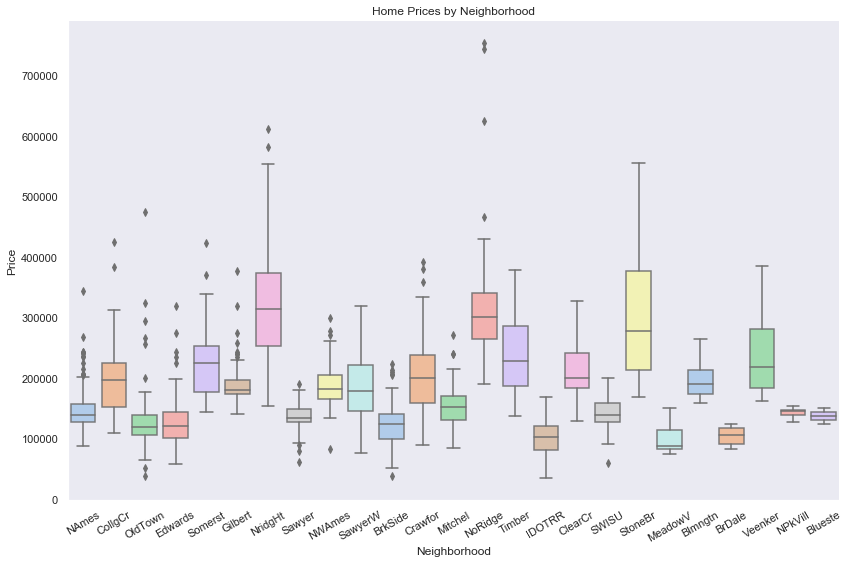

In [4]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="Neighborhood",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9),order = training_data["Neighborhood"].value_counts().index)
neighborhood_boxplot.set_xticklabels(neighborhood_boxplot.get_xticklabels(),rotation=30)

# Chart labels and formatting
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Home Prices by Neighborhood")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

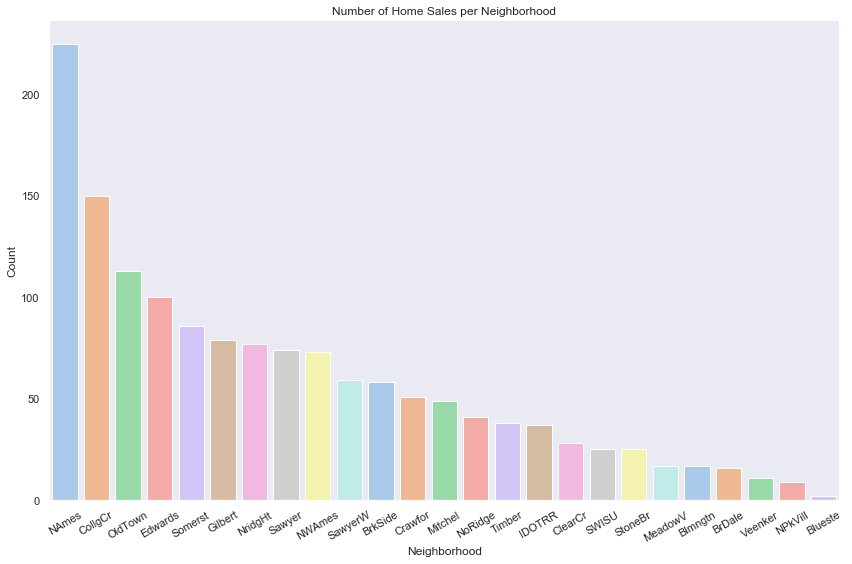

In [5]:
# Create bar graph in Seaborn (change opacity in matplotlib)
neighborhood_countplot=sns.countplot(x="Neighborhood",data=training_data, palette="pastel", order = training_data["Neighborhood"].value_counts().index)
neighborhood_countplot.set_xticklabels(neighborhood_countplot.get_xticklabels(),rotation=30)

# Chart labels and formatting
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Number of Home Sales per Neighborhood")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

### Quality Rating of Material and Finish of House
* It is most common for homes in Ames Iowa to have a quality of material and finish score of between 5 and 8
* Homes with higher quality of material and finish scores tend to have higher prices

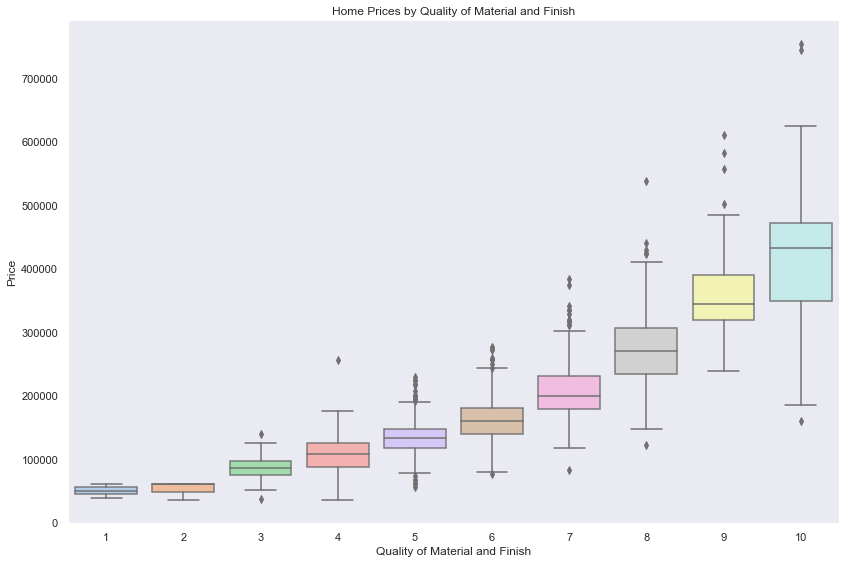

In [6]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="OverallQual",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Quality of Material and Finish")
plt.ylabel("Price")
plt.title("Home Prices by Quality of Material and Finish")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

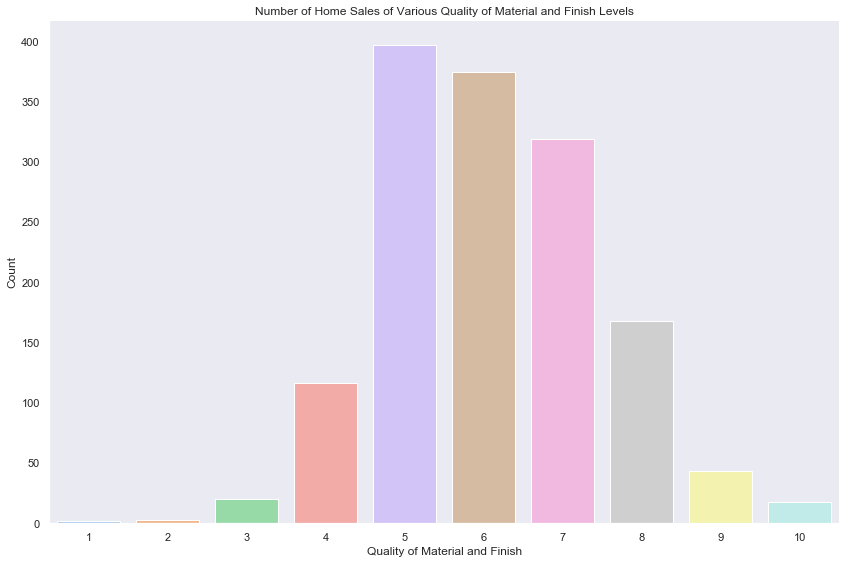

In [7]:
# Create bar graph in Seaborn (change opacity in matplotlib)
neighborhood_countplot=sns.countplot(x="OverallQual",data=training_data, palette="pastel")

# Chart labels and formatting
plt.xlabel("Quality of Material and Finish")
plt.ylabel("Count")
plt.title("Number of Home Sales of Various Quality of Material and Finish Levels")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

### Overall Condition of Homes
* It is most common for homes in Ames Iowa to have a condition score of around 5
* There is not a clear correlation between home condition score and home price

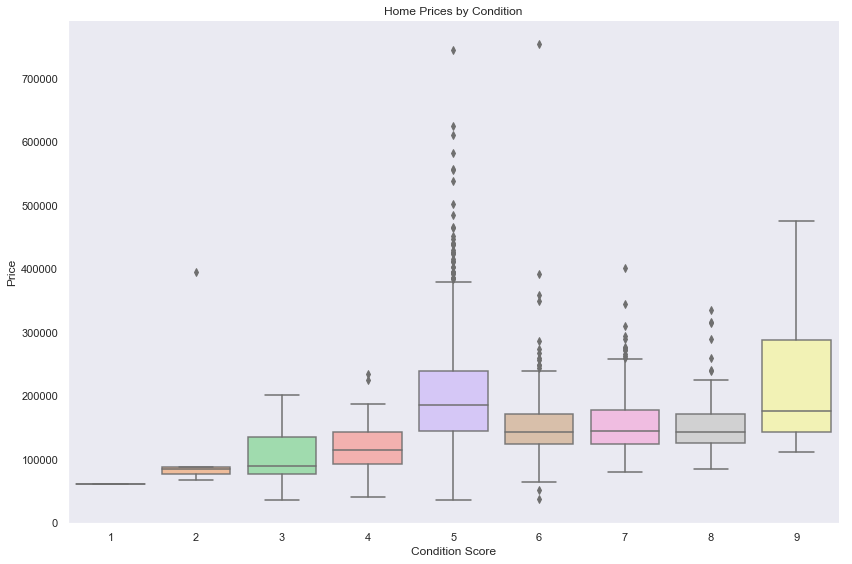

In [8]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="OverallCond",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Condition Score")
plt.ylabel("Price")
plt.title("Home Prices by Condition")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

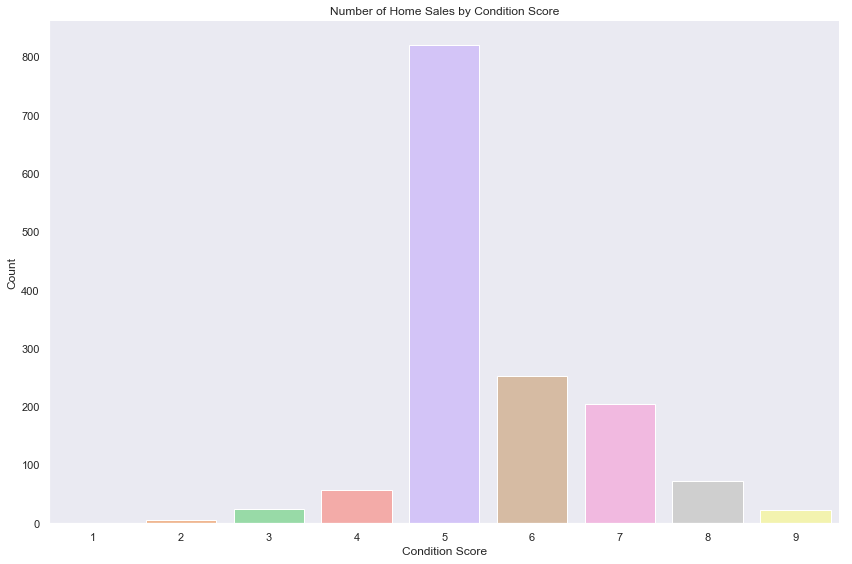

In [9]:
# Create bar graph in Seaborn (change opacity in matplotlib)
neighborhood_countplot=sns.countplot(x="OverallCond",data=training_data, palette="pastel")

# Chart labels and formatting
plt.xlabel("Condition Score")
plt.ylabel("Count")
plt.title("Number of Home Sales by Condition Score")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

### Exterior Material Quality
* It is most common for homes in Ames Iowa to have either "average" or "good" quality exterior materials
* Homes with higher exterior material qualities seem to have higher sales prices

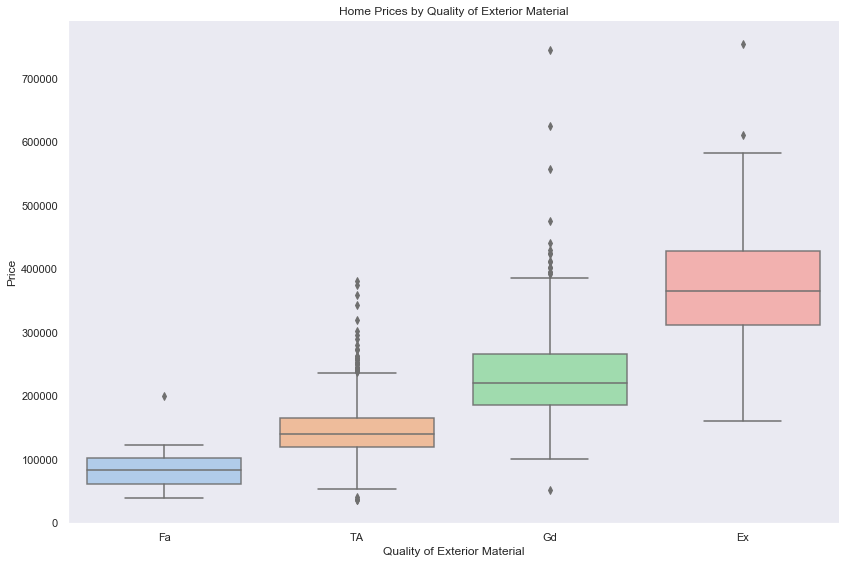

In [10]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="ExterQual",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9),order = ["Fa","TA", "Gd", "Ex"])

# Chart labels and formatting
plt.xlabel("Quality of Exterior Material")
plt.ylabel("Price")
plt.title("Home Prices by Quality of Exterior Material")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

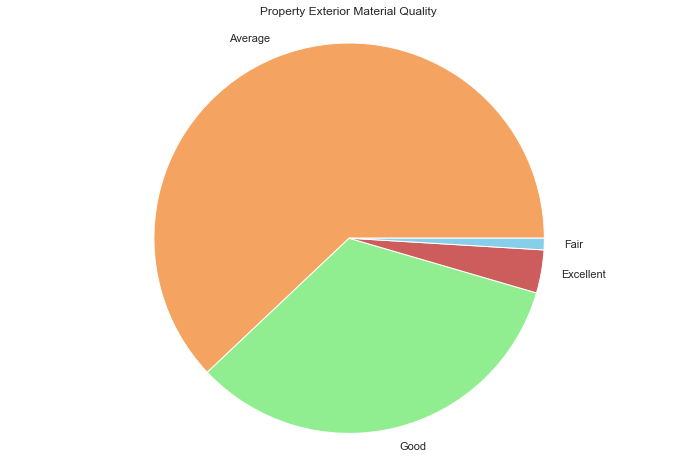

In [11]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["ExterQual"].value_counts(),labels=["Average","Good","Excellent","Fair"], colors = ["sandybrown","lightgreen","indianred","skyblue"])

# Chart labels and formatting
plt.title("Property Exterior Material Quality")
plt.axis("equal")

# Show chart and save
plt.show()

### Bedrooms Above Ground
* Homes in Ames, IA tend to be 2 or 3 bedrooms
* Surprisingly, there doesn't appear to be a clear impact of number of bedrooms on home price. It could be that things like neighborhood, quality, and condition are more important factors in determining a home's value

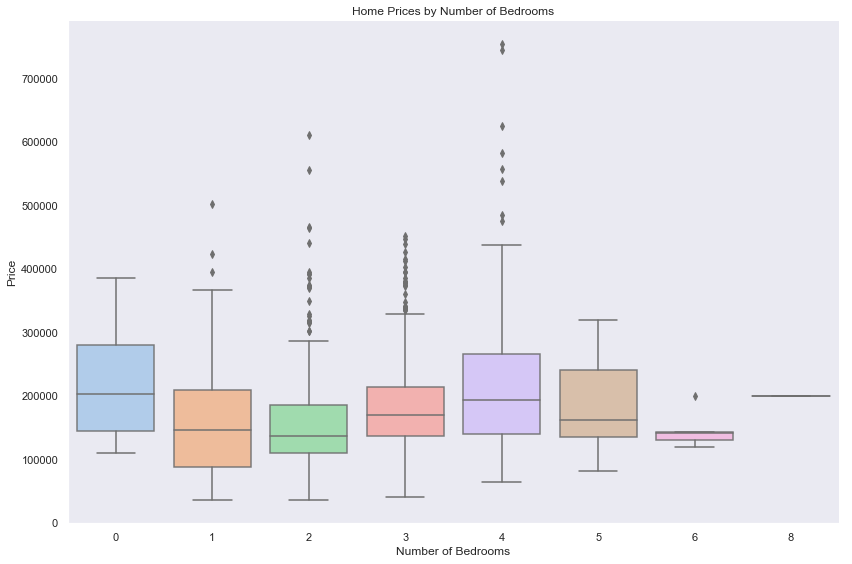

In [12]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="BedroomAbvGr",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Home Prices by Number of Bedrooms")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

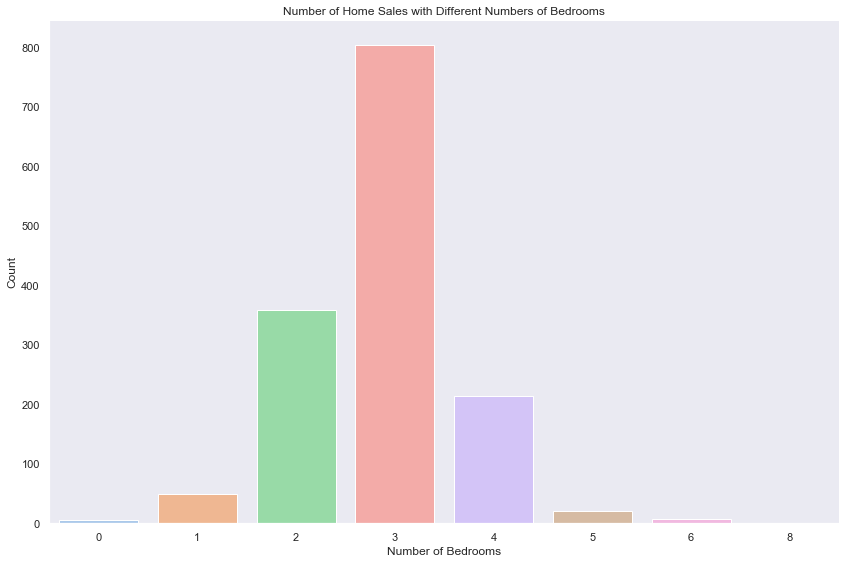

In [13]:
# Create bar graph in Seaborn (change opacity in matplotlib)
neighborhood_countplot=sns.countplot(x="BedroomAbvGr",data=training_data, palette="pastel")

# Chart labels and formatting
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.title("Number of Home Sales with Different Numbers of Bedrooms")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

### Bathrooms Above Ground
* Homes in Ames, IA tend to have 1 or 2 bathrooms
* Surprisingly, there doesn't appear to be a clear impact of number of bathrooms on home price. It could be that things like neighborhood, quality, and condition are more important factors in determining a home's value. It does look like homes with three bathrooms tend to cost significantly more than other homes, but there aren't many data points in that category

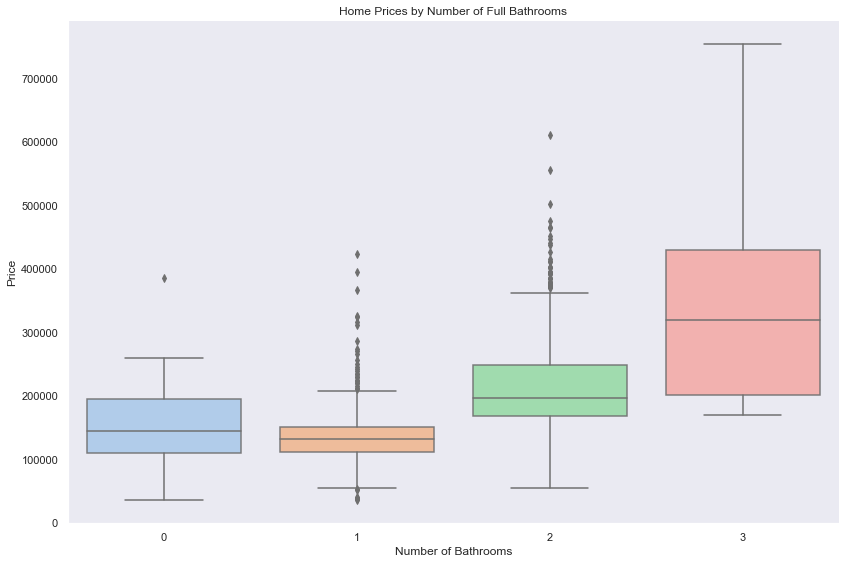

In [14]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="FullBath",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Home Prices by Number of Full Bathrooms")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

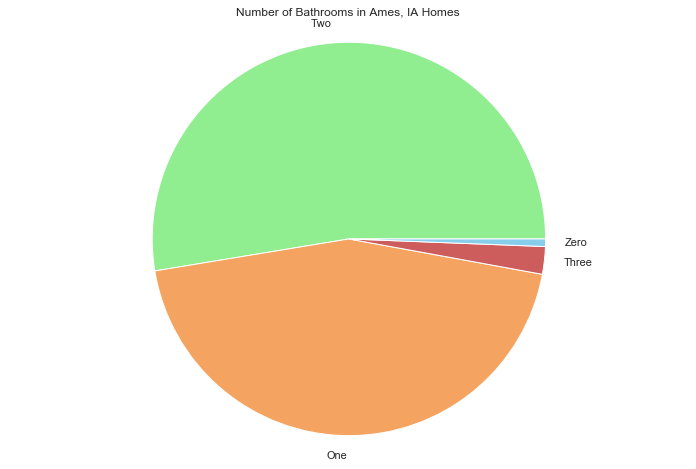

In [15]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["FullBath"].value_counts(), labels = ["Two","One","Three","Zero"], colors = ["lightgreen","sandybrown","indianred","skyblue"])

# Chart labels and formatting
plt.title("Number of Bathrooms in Ames, IA Homes")
plt.axis("equal")

# Show chart and save
plt.show()

### Half Bathrooms Above Ground
* Homes in Ames, IA tend to have 0 or 1 half bathrooms
* Surprisingly, there doesn't appear to be a clear impact of number of half bathrooms on home price. It could be that things like neighborhood, quality, and condition are more important factors in determining a home's value

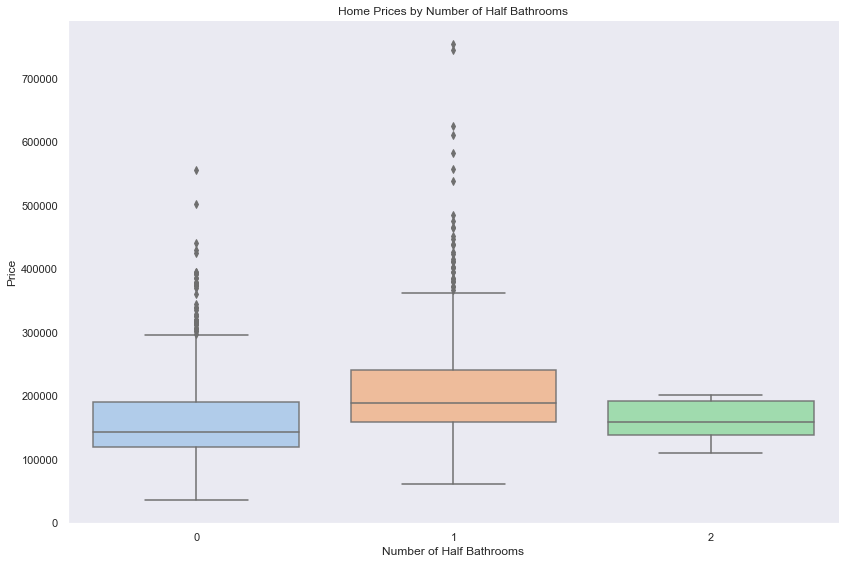

In [16]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="HalfBath",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Number of Half Bathrooms")
plt.ylabel("Price")
plt.title("Home Prices by Number of Half Bathrooms")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

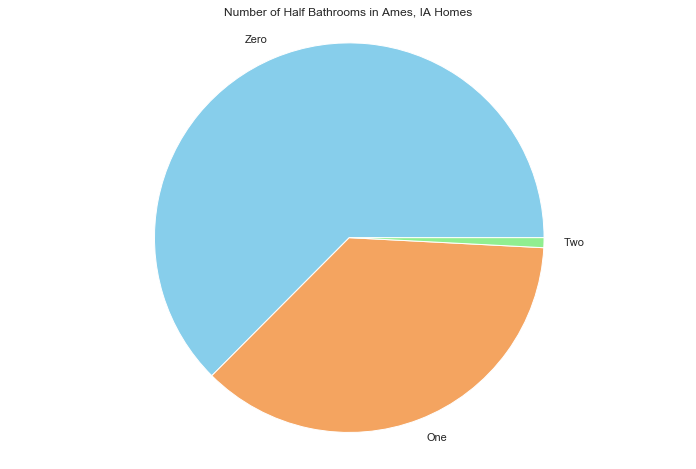

In [17]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["HalfBath"].value_counts(), labels = ["Zero","One","Two"] ,colors = ["skyblue","sandybrown","lightgreen"])

# Chart labels and formatting
plt.title("Number of Half Bathrooms in Ames, IA Homes")
plt.axis("equal")

# Show chart and save
plt.show()

### Basement Full Bathrooms
* Homes in Ames, IA tend to have 0 or 1 basement full bathrooms
* Surprisingly, there doesn't appear to be a clear impact of number of basement full bathrooms on home price. It could be that things like neighborhood, quality, and condition are more important factors in determining a home's value

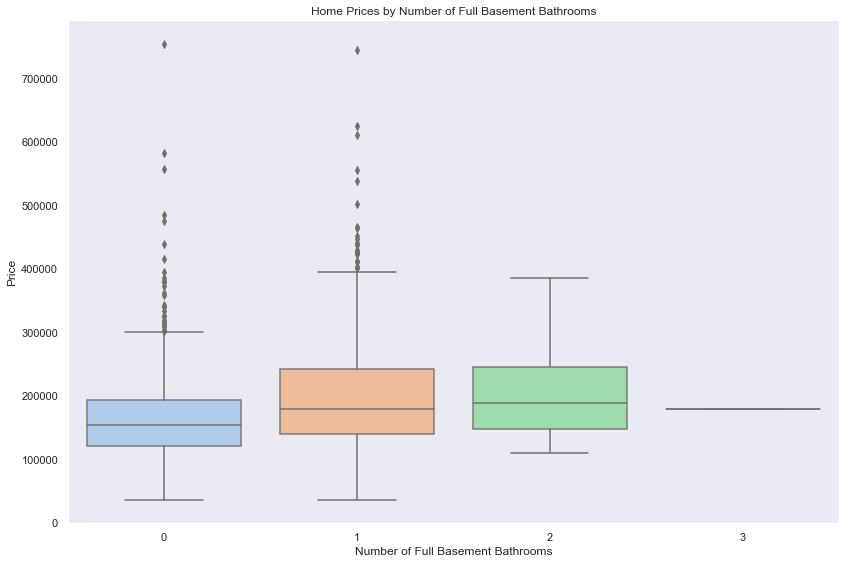

In [18]:
# Set figure size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="BsmtFullBath",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Number of Full Basement Bathrooms")
plt.ylabel("Price")
plt.title("Home Prices by Number of Full Basement Bathrooms")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

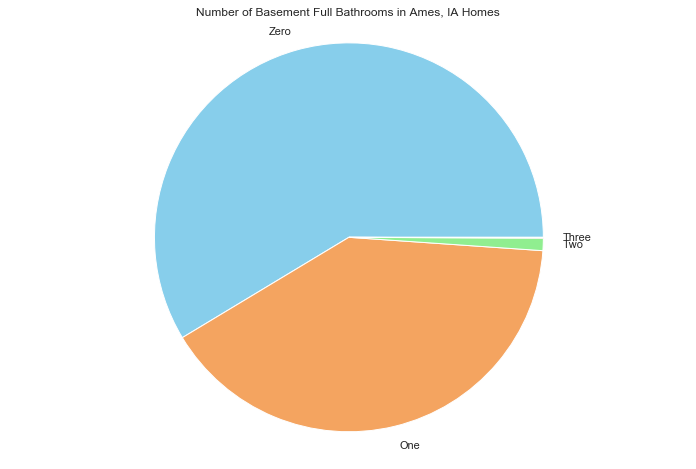

In [19]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["BsmtFullBath"].value_counts(), labels = ["Zero","One","Two","Three"] ,colors = ["skyblue","sandybrown","lightgreen","indianred"])

# Chart labels and formatting
plt.title("Number of Basement Full Bathrooms in Ames, IA Homes")
plt.axis("equal")

# Show chart and save
plt.show()

### Basement Half Bathrooms
* Homes in Ames, IA tend to have 0 basement half bathrooms
* Surprisingly, there doesn't appear to be a clear impact of number of basement half bathrooms on home price. It could be that things like neighborhood, quality, and condition are more important factors in determining a home's value

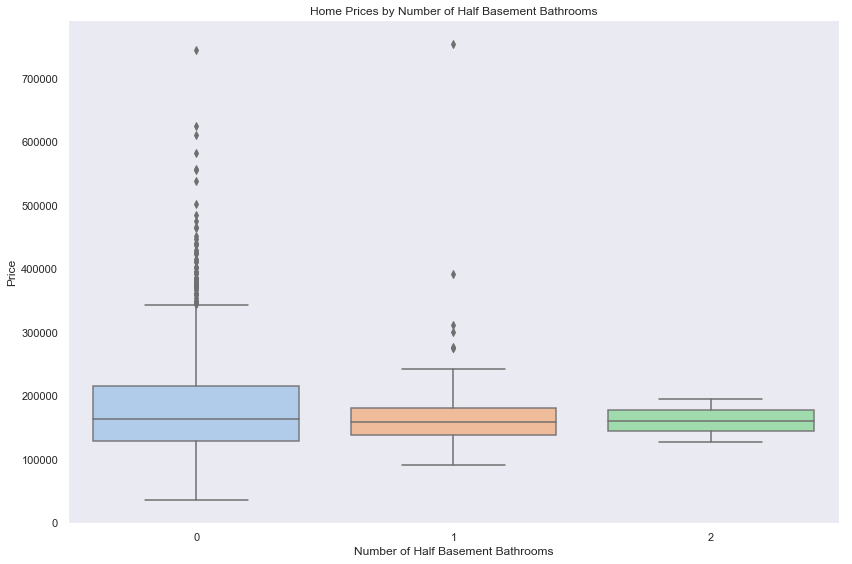

In [20]:
# Set figure size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="BsmtHalfBath",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Number of Half Basement Bathrooms")
plt.ylabel("Price")
plt.title("Home Prices by Number of Half Basement Bathrooms")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

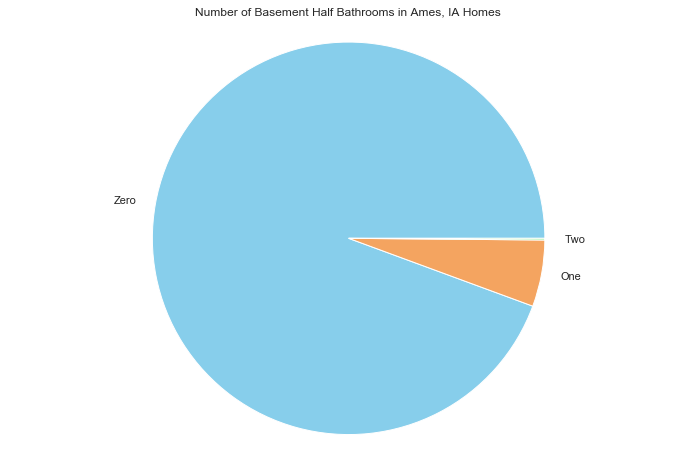

In [21]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["BsmtHalfBath"].value_counts(), labels = ["Zero","One","Two"] ,colors = ["skyblue","sandybrown","lightgreen"])

# Chart labels and formatting
plt.title("Number of Basement Half Bathrooms in Ames, IA Homes")
plt.axis("equal")

# Show chart and save
plt.show()

### Fireplaces
* Homes in Ames, IA tend to have 0 or 1 fireplaces
* Homes with more fireplaces tend to be associated with higher prices. Keep in mind, these are probably larger homes

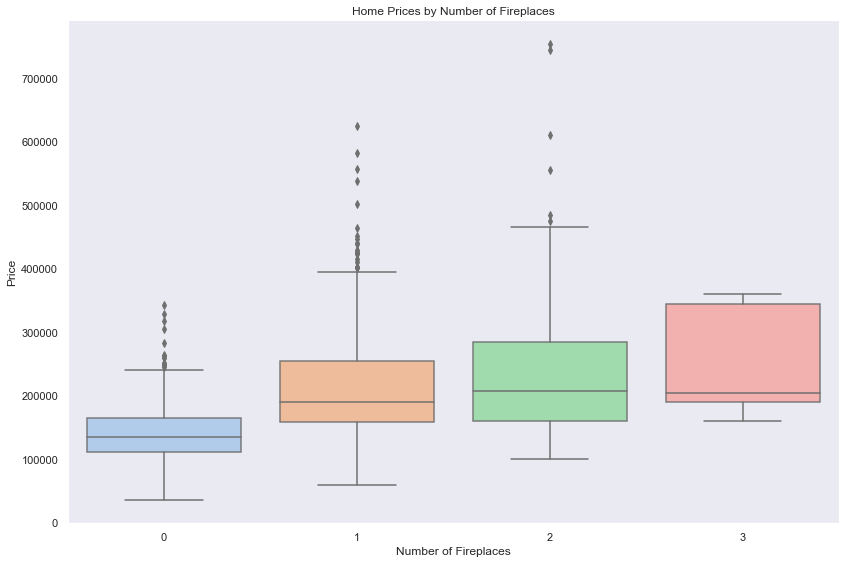

In [22]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="Fireplaces",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Number of Fireplaces")
plt.ylabel("Price")
plt.title("Home Prices by Number of Fireplaces")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

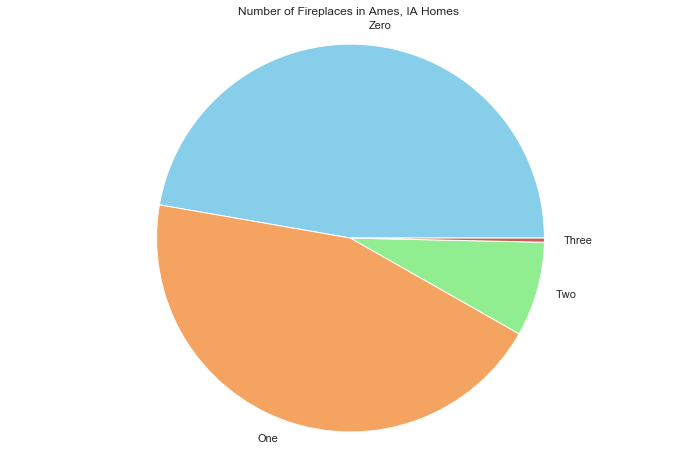

In [23]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["Fireplaces"].value_counts(), labels = ["Zero","One","Two","Three"] ,colors = ["skyblue","sandybrown","lightgreen","indianred"])

# Chart labels and formatting
plt.title("Number of Fireplaces in Ames, IA Homes")
plt.axis("equal")

# Show chart and save
plt.show()

### Central Air
* Ames, IA homes overwhelmingly tend to have central air
* Central air is associated with higher home prices in Ames, IA

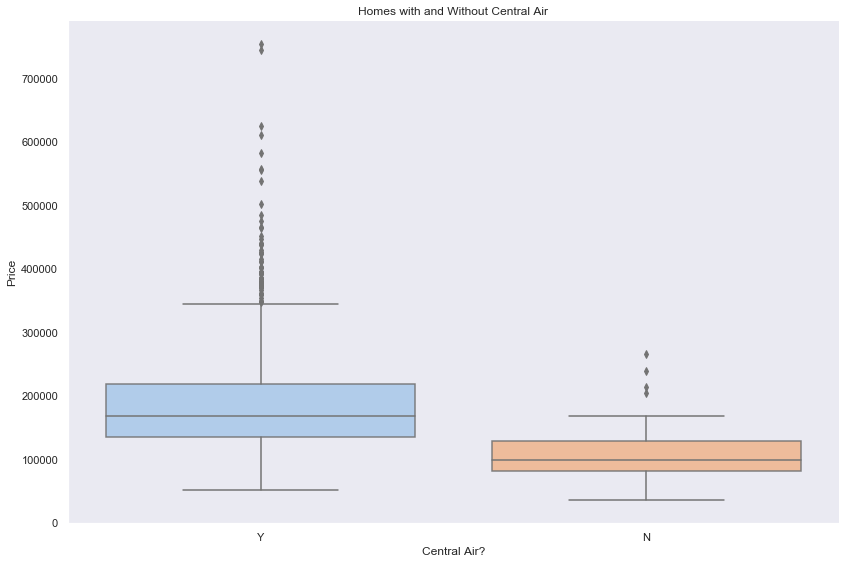

In [24]:
# Set pie chart
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="CentralAir",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Central Air?")
plt.ylabel("Price")
plt.title("Homes with and Without Central Air")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

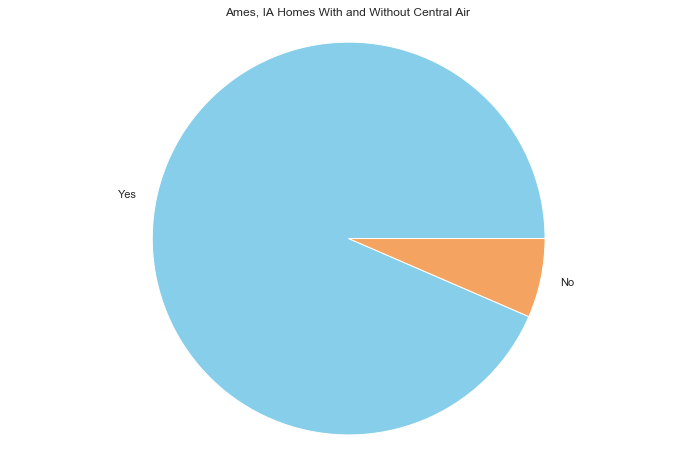

In [25]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["CentralAir"].value_counts(), labels = ["Yes","No"] ,colors = ["skyblue","sandybrown"])

# Chart labels and formatting
plt.title("Ames, IA Homes With and Without Central Air")
plt.axis("equal")

# Show chart and save
plt.show()

### Type of Dwelling
* It appears that type of dwelling (single story, two story, split level, etc.) does slightly impact home price. However, it is important to mention that a lot of these terms are also correlated with home size so it might be worth excluding this variable from the multiple linear regression

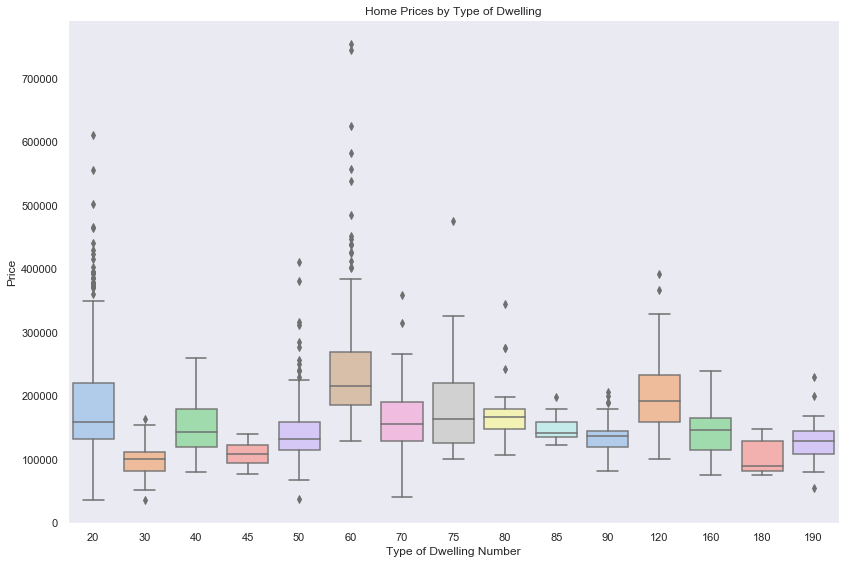

In [26]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="MSSubClass",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Type of Dwelling Number")
plt.ylabel("Price")
plt.title("Home Prices by Type of Dwelling")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

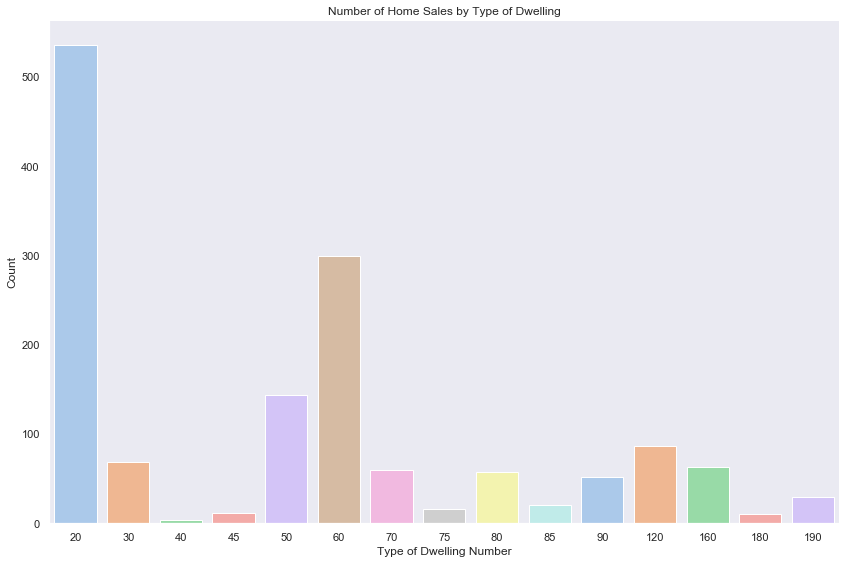

In [27]:
# Create bar chart in Seaborn (change opacity in matplotlib)
neighborhood_countplot=sns.countplot(x="MSSubClass",data=training_data, palette="pastel")

# Chart labels and formatting
plt.xlabel("Type of Dwelling Number")
plt.ylabel("Count")
plt.title("Number of Home Sales by Type of Dwelling")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

### Flatness of Property
* Almost all homes in Ames, IA are on flat properties
* There does not seem to be a super clear relationship between property flatness and property price. That combined with the relatively small number of properties that are not on flat properties means that property flatness probably is probably not a great variable to use in the multi linear regression model

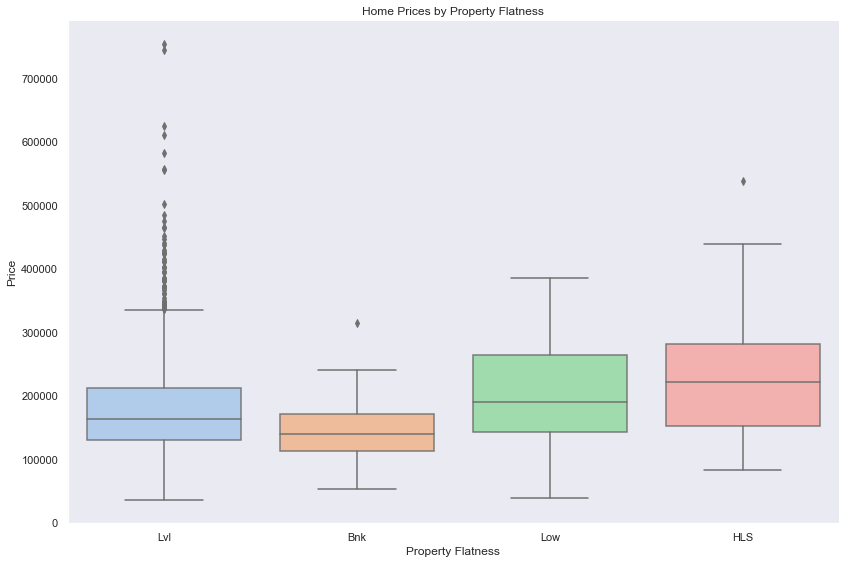

In [28]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="LandContour",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Property Flatness")
plt.ylabel("Price")
plt.title("Home Prices by Property Flatness")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

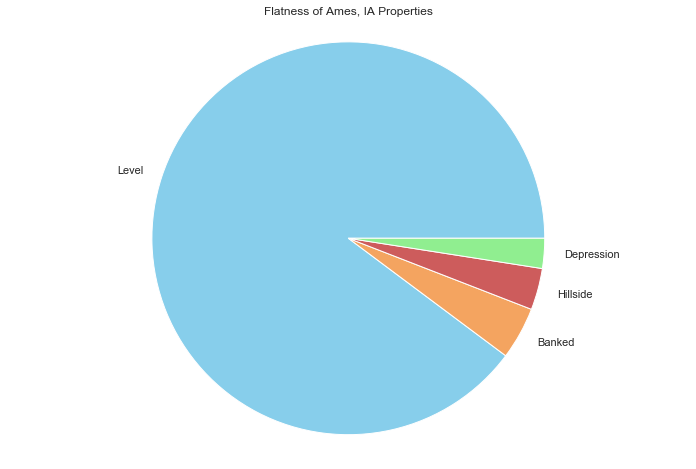

In [29]:
# Create bar chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["LandContour"].value_counts(), labels = ["Level","Banked","Hillside","Depression"] ,colors = ["skyblue","sandybrown","indianred","lightgreen"])

# Chart labels and formatting
plt.title("Flatness of Ames, IA Properties")
plt.axis("equal")

# Show chart and save
plt.show()

### Kitchen Quality
* Kitchens in Ames, IA tend to be of either "average" or "good" quality
* It appears that higher kitchen quality is also associated with higher home prices. It will be interesting to see if the effect is significant with the inclusion of other "home quality" indices

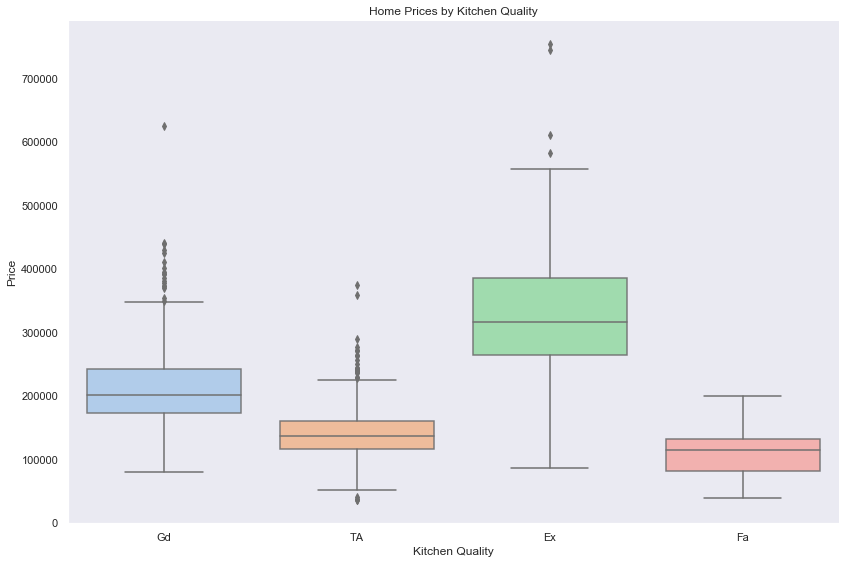

In [30]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="KitchenQual",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Kitchen Quality")
plt.ylabel("Price")
plt.title("Home Prices by Kitchen Quality")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

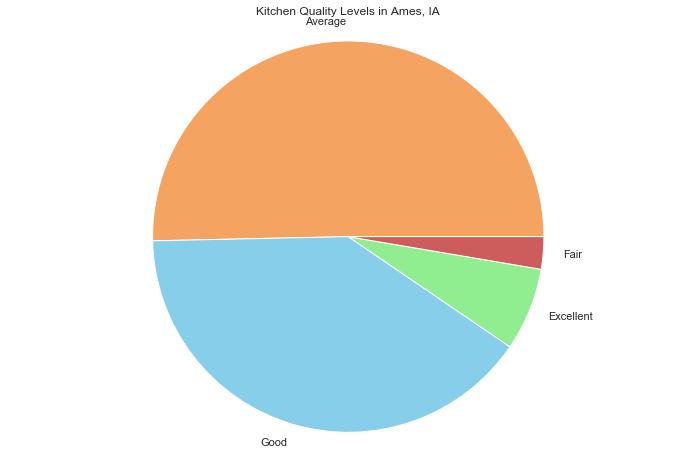

In [31]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["KitchenQual"].value_counts(), labels = ["Average","Good","Excellent","Fair"] ,colors = ["sandybrown","skyblue","lightgreen","indianred"])

# Chart labels and formatting
plt.title("Kitchen Quality Levels in Ames, IA")
plt.axis("equal")

# Show chart and save
plt.show()

### Garage Size
* Ames, IA garages tend to be either one or two car garages
* It appears that larger garages are associated with higher home prices

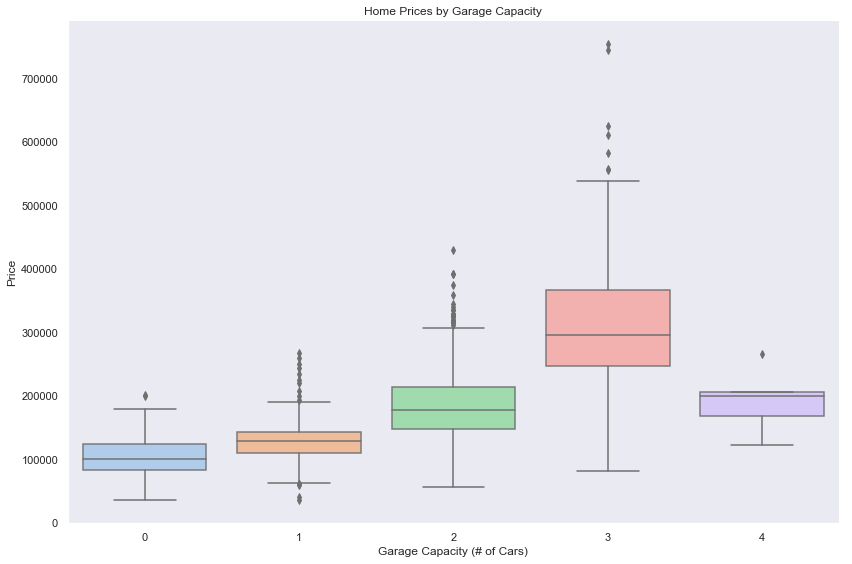

In [32]:
# Set fig size
sns.set(rc={'figure.figsize':(12,8),'figure.facecolor': 'white'})

# Create boxplot in Seaborn (change opacity in matplotlib)
neighborhood_boxplot=sns.boxplot(x="GarageCars",y="SalePrice",data=training_data, palette="pastel", boxprops=dict(alpha=.9))

# Chart labels and formatting
plt.xlabel("Garage Capacity (# of Cars)")
plt.ylabel("Price")
plt.title("Home Prices by Garage Capacity")
plt.grid(False)
sns.despine()
plt.tight_layout()

# Show chart and save
plt.show()

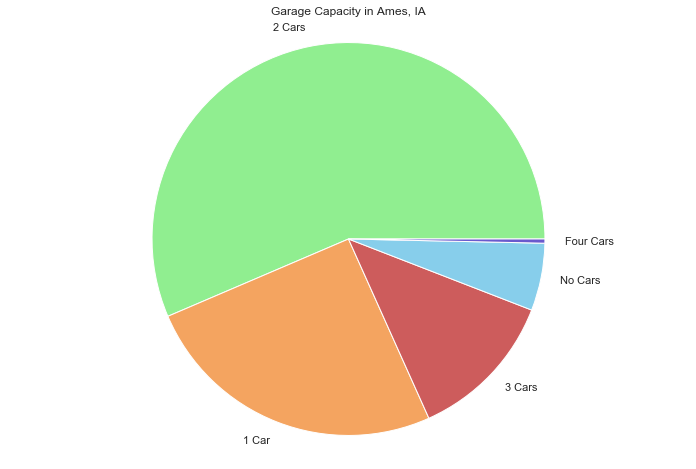

In [33]:
# Create pie chart in Seaborn (change opacity in matplotlib)
plt.pie(training_data["GarageCars"].value_counts(), labels = ["2 Cars","1 Car","3 Cars","No Cars","Four Cars"] ,colors = ["lightgreen","sandybrown","indianred","skyblue","slateblue"])

# Chart labels and formatting
plt.title("Garage Capacity in Ames, IA")
plt.axis("equal")

# Show chart and save
plt.show()